# Wine quality data visualization

In this project, we will look at a data set containing physiochemical observations and quality assessment for several red and white variants of the Portuguese "vinho verde" wine.
This dataset was provided by UCI Machine Learning and can be found on [kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/version/2).

Our goal will be twofold:
* Visualize the data, and look for potential correlations between variables, especially with wine quality
* Use machine learning to predict the wine quality with an acceptable margin of error

In [1]:
#Import packages
import numpy as np #For data analysis and wrangling
import pandas as pd #For dataframes and data wrangling
import matplotlib.pyplot as plt #For plotting
import seaborn as sns #For plotting
from scipy.stats import shapiro, anderson #For initial data distribution analysis

## Overview of the data

We will first have a look at the data set.

In [2]:
#Look at the shape of the data
wine_data = pd.read_csv("https://raw.githubusercontent.com/SPariente/wine_quality/master/winequality-red.csv") #Load the dataset from github
wine_data.head() #Look at the shape of the dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
wine_data.info() #Get some information on possible missing values and on data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This specific data set contains 1,599 observations, each representing a specific wine variant. For each of these, several phisiochemical properties are reported, as well as an assessed quality:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality: score between 0 and 10, based on sensory data (the output variable)

In [4]:
wine_data.describe() #Get a synthetic statistical view of the dataset

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

A basic statistical view of the data set shows variability across all dimensions, but also no unexpected 0-values at first glance.

In [5]:
shapiro_wilks_test = pd.DataFrame(wine_data.apply(lambda x: shapiro(x), axis = 0)) #Get a Shapiro-Wilks normality test on all the fields
shapiro_wilks_test.set_index(pd.Series(['statistic','p-value'])) #Give names to the rows for ease of reading

fixed acidity  volatile acidity   citric acid  residual sugar  \
statistic   9.420307e-01      9.743341e-01  9.552900e-01        0.566077   
p-value     1.525595e-24      2.686807e-16  1.020820e-21        0.000000   

           chlorides  free sulfur dioxide  total sulfur dioxide       density  \
statistic   0.484247         9.018407e-01          8.732254e-01  9.908668e-01   
p-value     0.000000         7.697398e-31          3.574144e-34  1.940096e-08   

                 pH     sulphates       alcohol       quality  
statistic  0.993487  8.330425e-01  9.288390e-01  8.575844e-01  
p-value    0.000002  5.821618e-38  6.643665e-27  9.504004e-36

In [6]:
anderson_test = pd.DataFrame(wine_data.apply(lambda x: anderson(x, dist = 'norm'), axis = 0)) #Get an Anderson test to compare to a normal distribution
anderson_test.set_index(pd.Series(['statistic','critical_values', 'significance_level'])) #Give names to the rows for ease of reading

fixed acidity  \
statistic                                     28.142958   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                       volatile acidity  \
statistic                                      5.683075   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                            citric acid  \
statistic                                     17.542087   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                         residual sugar  \
statistic                                    188.064449   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                              chlorides  \
statistic                                    210.449187   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                    free sulfur dioxide  \
statistic                                      38.60991   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                   total sulfur dioxide  \
statistic                                     52.488651   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                                density  \
statistic                                      3.867595   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                                     pH  \
statistic                                      1.864112   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                              sulphates  \
statistic                                     46.932195   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                                alcohol  \
statistic                                     34.917064   
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]   
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]   

                                                quality  
statistic                                    110.632768  
critical_values     [0.575, 0.654, 0.785, 0.916, 1.089]  
significance_level          [15.0, 10.0, 5.0, 2.5, 1.0]

From the two normality tests made, we can see that the data does not seem to follow a normal distribution across any of the dimensions. While some fields look closer than the rest (e.g. pH or volatile acidity), none are above the test thresholds to assign a normal distribution to them.

## Data visualization

### Quality distribution

Our first task will be to look at the shape of quality data, to visualize the distribution for the outcome variable.

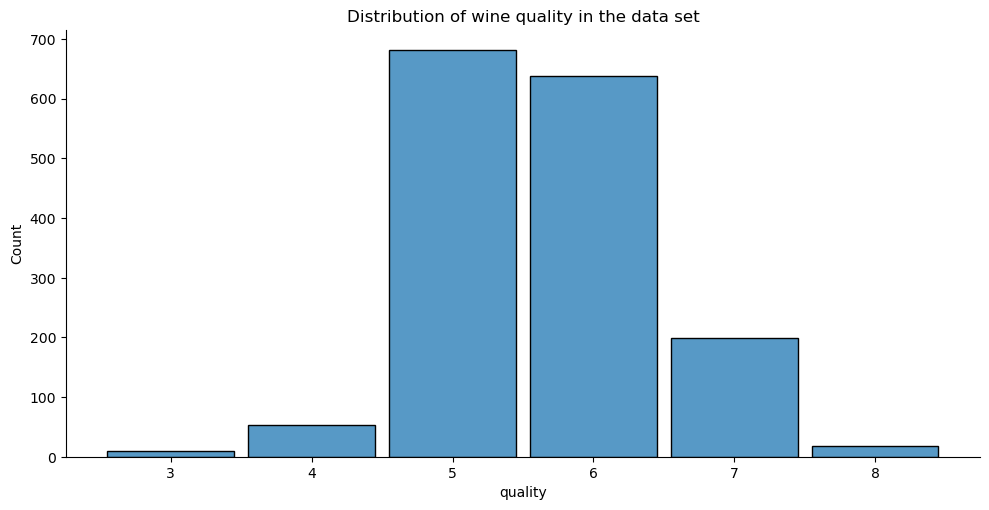

In [7]:
#Distribution plot for the quality field
sns.displot(
    data = wine_data, #Data set
    x = 'quality', #Field
    shrink = 0.9, #Set some space between each bar
    discrete = True, #Sets the data to be discrete values
    height = 5, #Height of the figure
    aspect = 10/5 #Aspect ratio of the figure
)

plt.title("Distribution of wine quality in the data set") #Title

plt.show() #Show the figure

As we can see, the data set is unbalanced, with most observations having quality scores of 5-6, and very few observations with extreme scores of 3 or 8. This needs to be taken into consideration down the line, especially when we move on to the modelling phase.

## Other variables

### Density plots

Considering our objective to look at potential factors affecting the assessed wine quality, we will look at the other variables while segregating them by the reported wine quality.
We already know that the variables do not follow a normal distribution, although some are closer than others, so we can expect the distribution plot to show this.

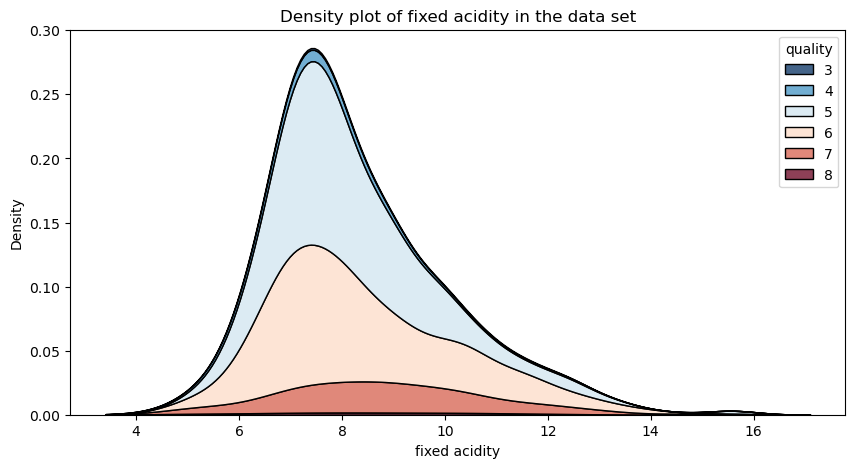

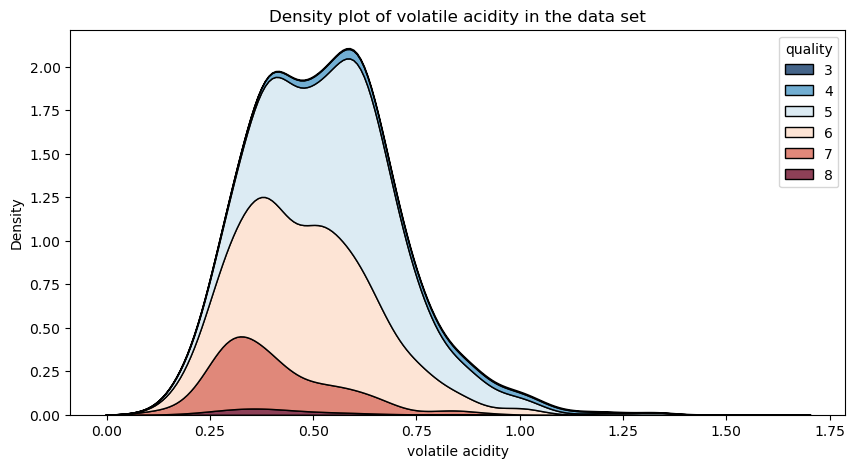

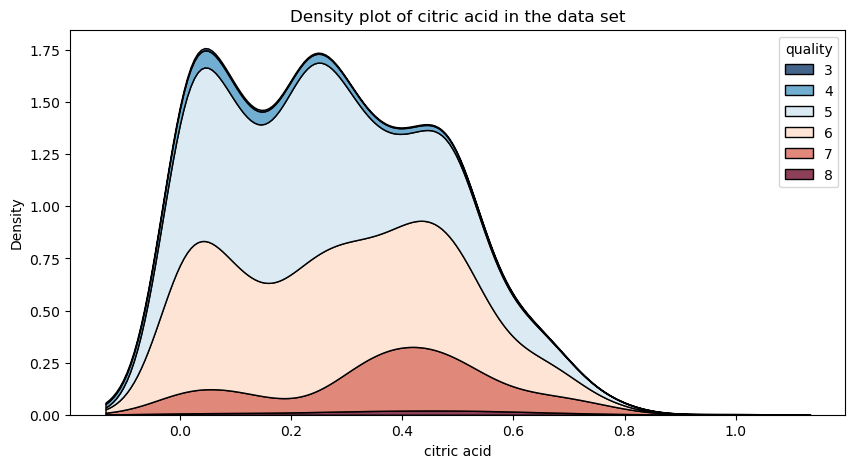

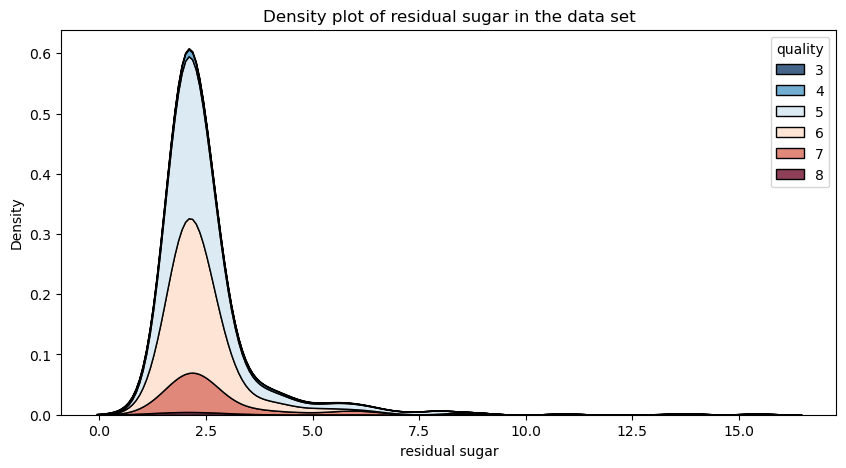

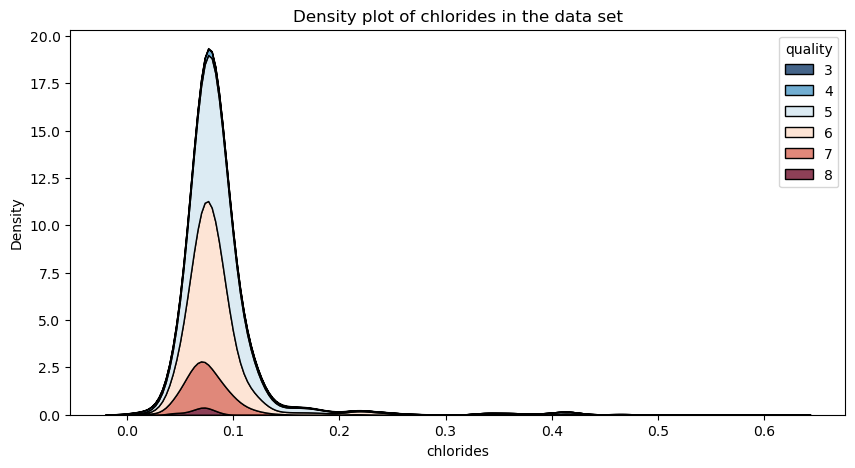

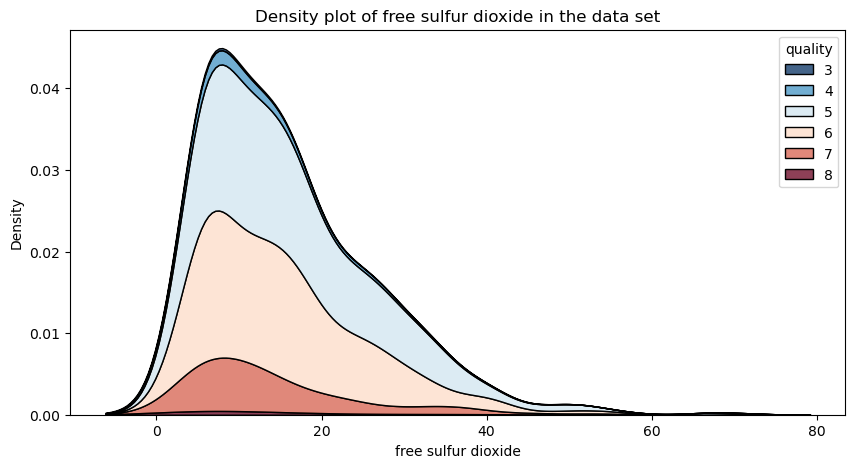

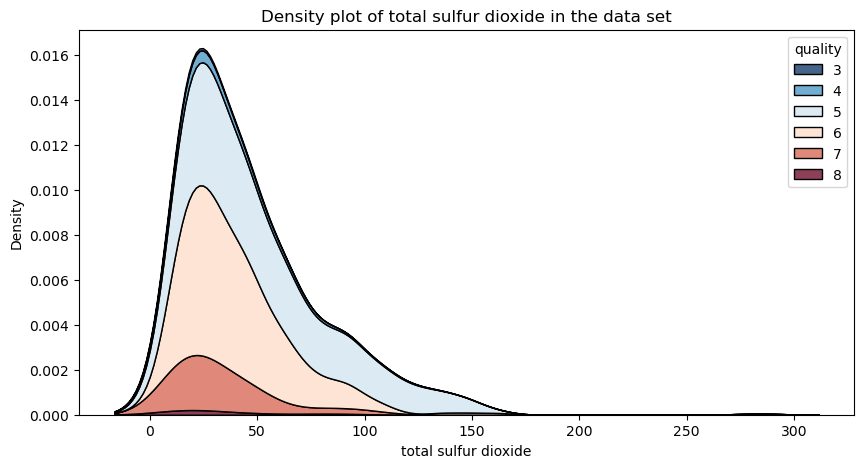

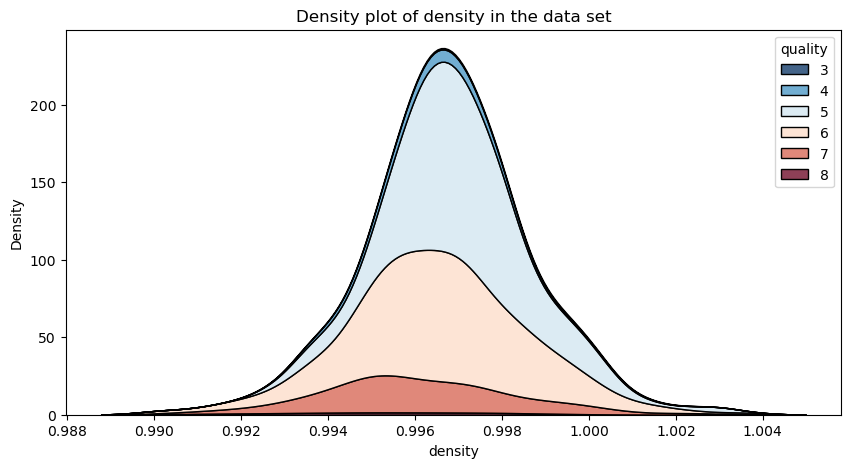

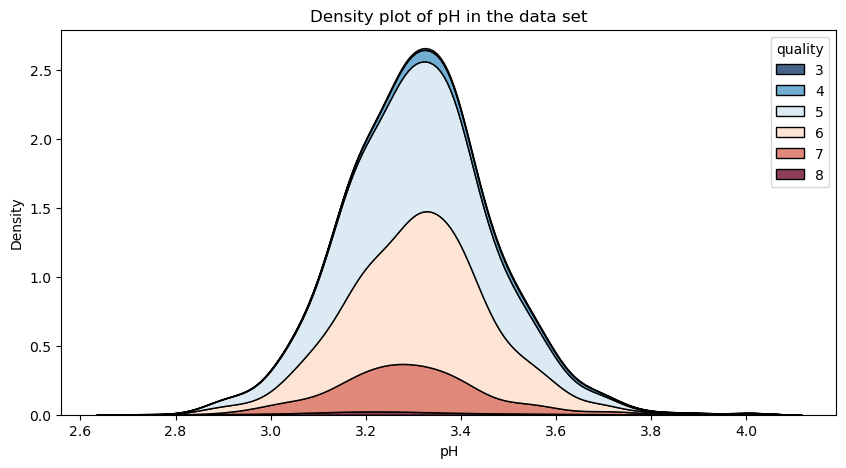

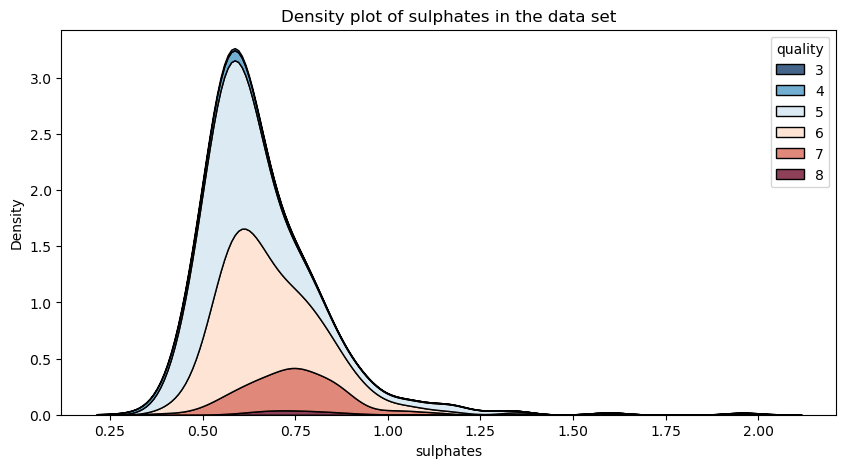

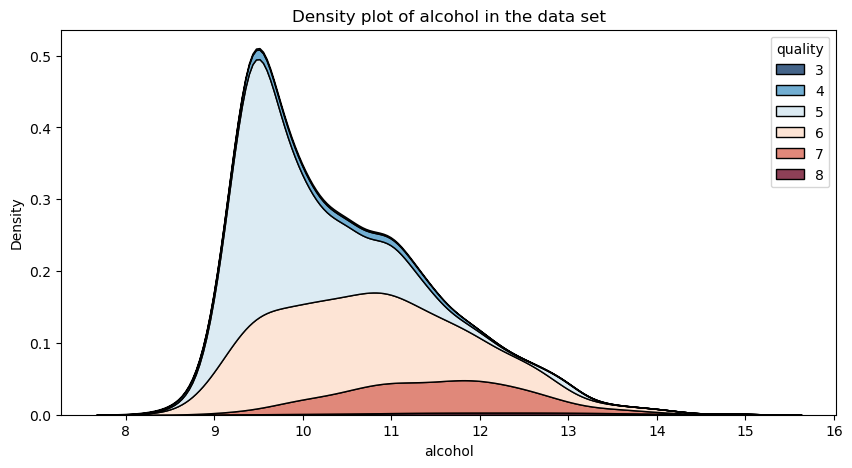

In [8]:
#Density plots
predictors = wine_data.columns.drop('quality') #Get a list of predictors

for col in predictors: #Iterate through this list
    fig, ax = plt.subplots(figsize = (10,5)) #Initialise subplot with given figure size
    ax = sns.kdeplot( #KDE plot to visualize density
        data = wine_data, #Data set
        x = col, #Predictor
        hue = 'quality', #Color by quality
        palette = 'RdBu_r', #High contrast color scheme
        multiple = 'stack' #Stach density plots by quality on top of one another
    )
    
    plt.title("Density plot of "+col+" in the data set") #Title
    
    plt.show() #Show figure

### Box and violin plots by quality

Next, we will have another look at the distribution of our data across variables, by reported wine quality. To this end, a combination of box plots and violin plots will be used, the first to highlight the mean, quartiles, and extreme values, while the second will give a better idea of the shape of the distribution curve for each variable.

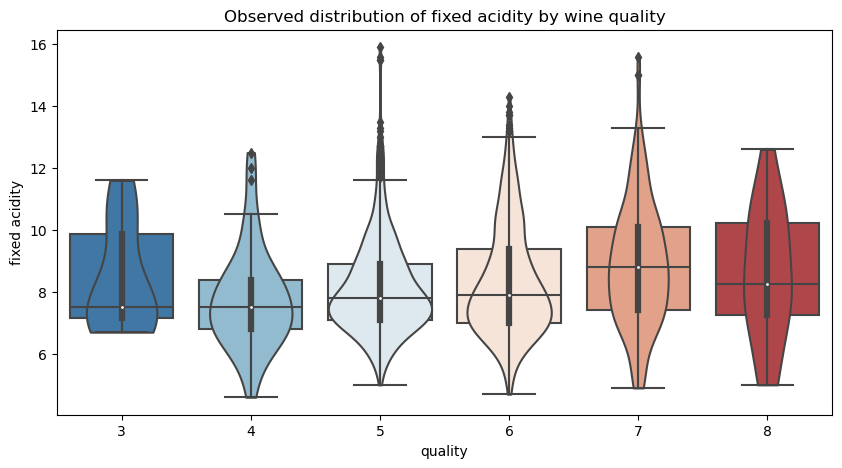

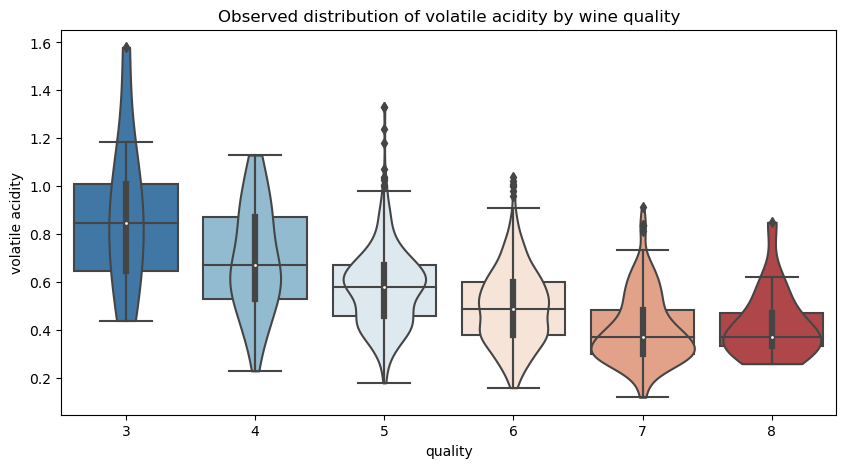

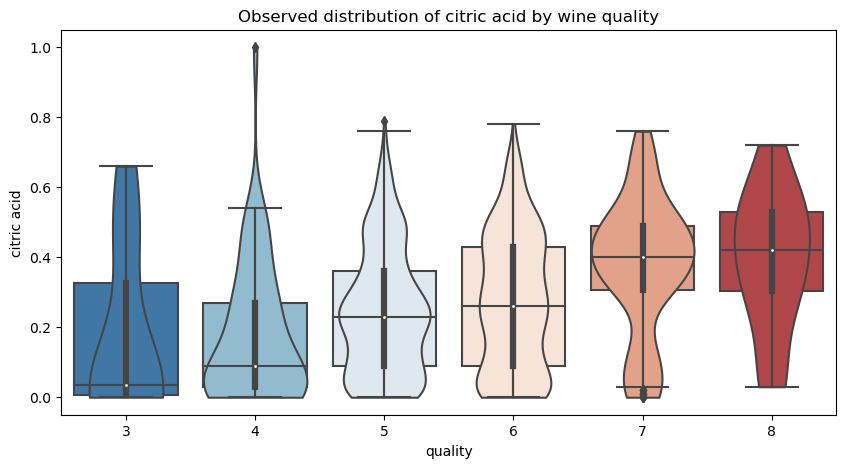

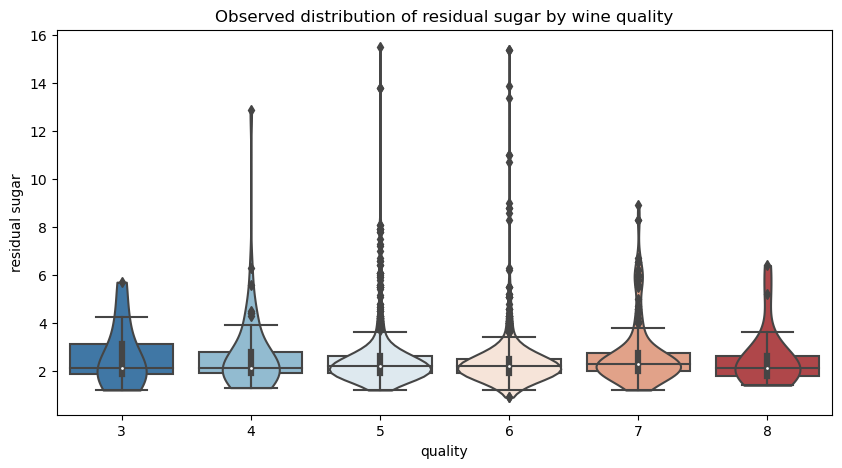

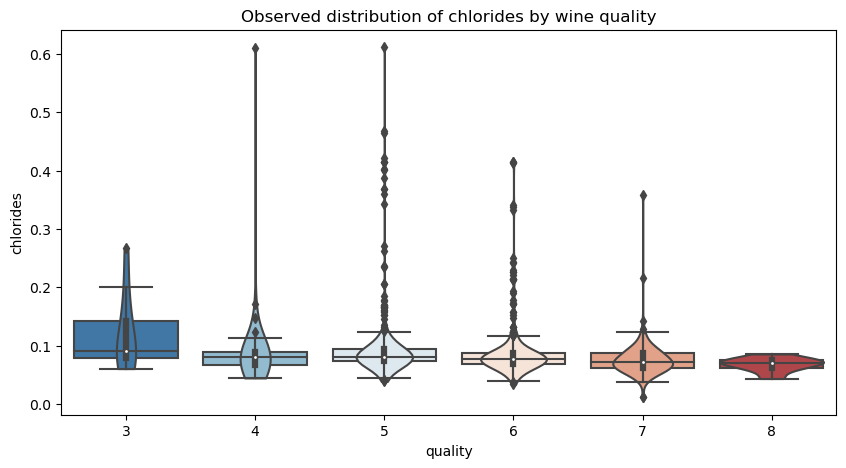

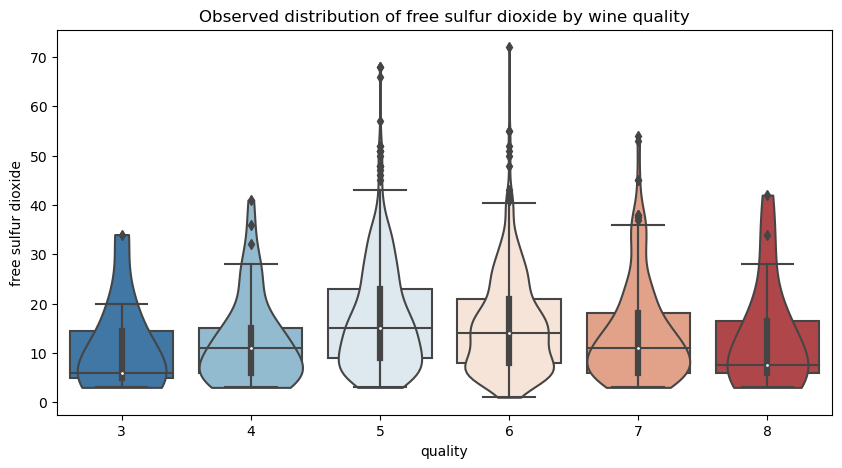

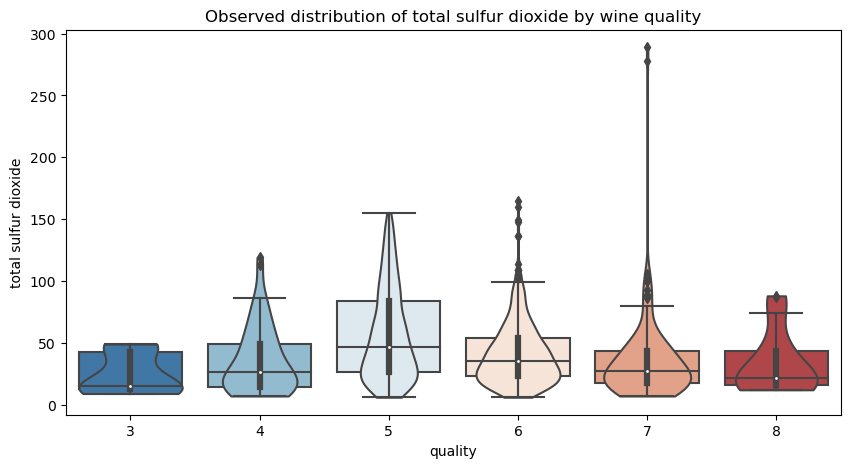

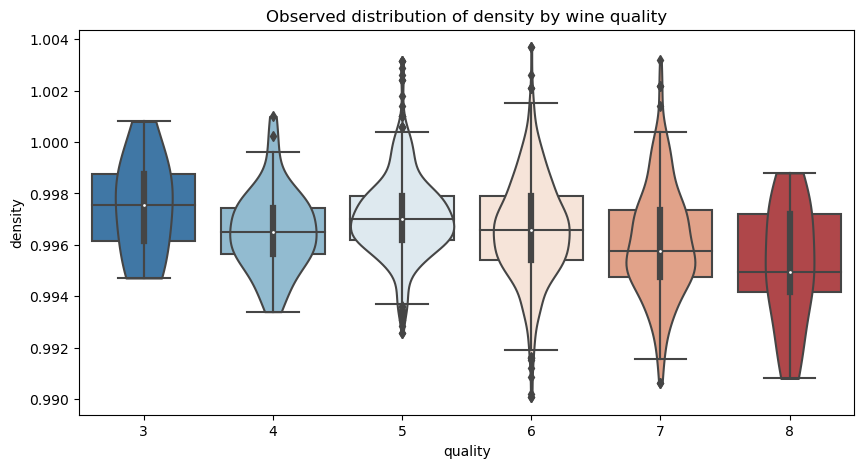

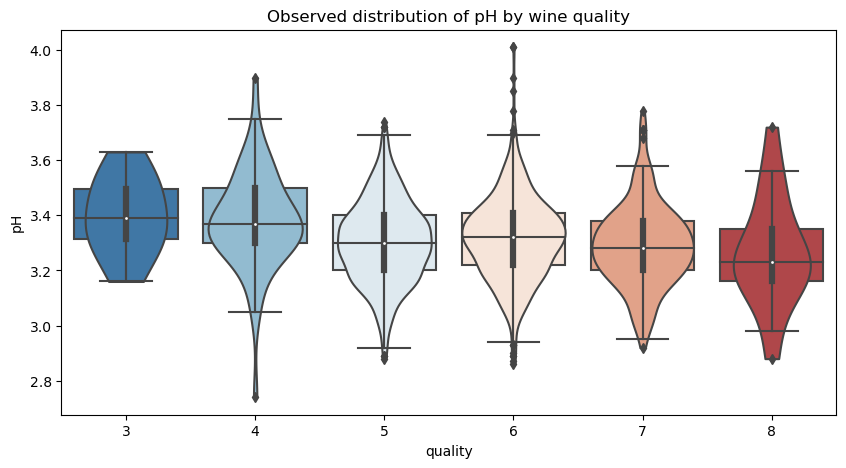

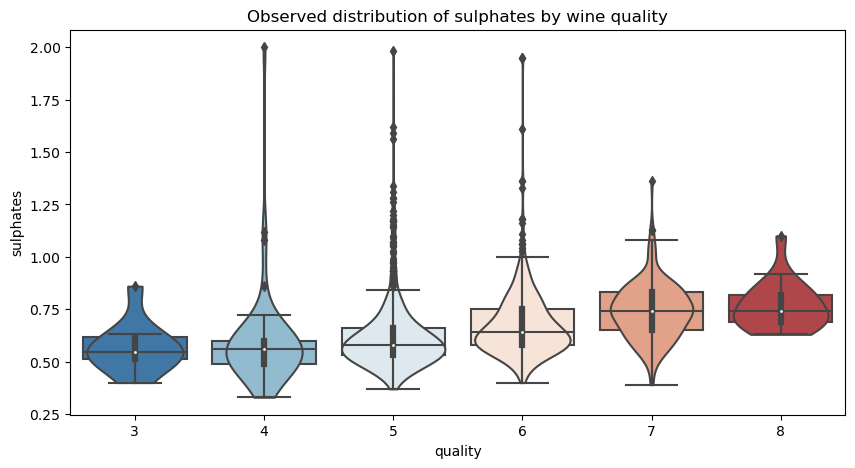

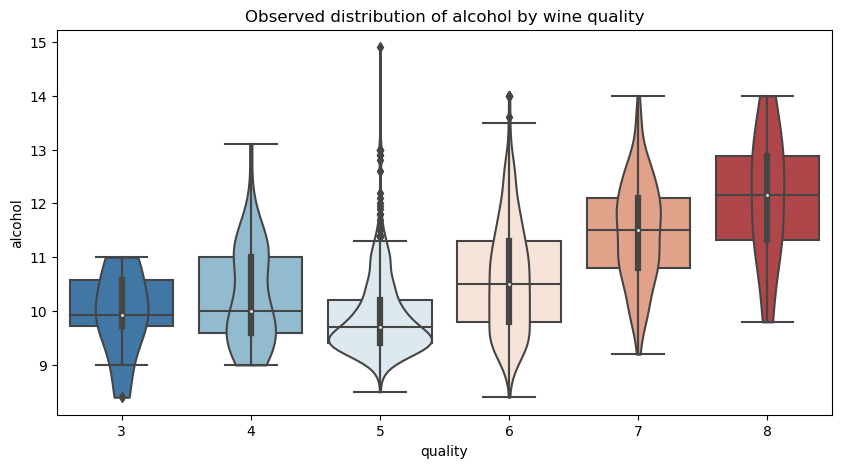

In [9]:
#Box and violin plots
for colname in predictors: #Iterate through the list of predictors
    fig, ax = plt.subplots(figsize = (10,5)) #Initialise subplots with given figure size
    ax = sns.boxplot( #Boxplot
        data = wine_data, #Data
        x = 'quality', #By quality
        y = colname, #Predictor data
        palette = 'RdBu_r' #High contrast color scheme
    )
    ax = sns.violinplot( #Add a violin plot on top of the boxplot
        data = wine_data, #Data
        x = 'quality', #By quality
        y = colname, #Predictor data
        palette = 'RdBu_r', #High contrast color scheme
        cut = 0 #Stop the tail with the data
    )
    
    ax.set_title("Observed distribution of "+colname+" by wine quality") #Title
    
    plt.show() #Show figure
    

We can already see what looks like a correlation between several variables and the reported wine quality, despite some observed outliers. We will explore the possible correlations next.

### Exploring correlations between variables

To explore possible correlations between variables, our first step will be to look at pair wise scatter plots for all variables.

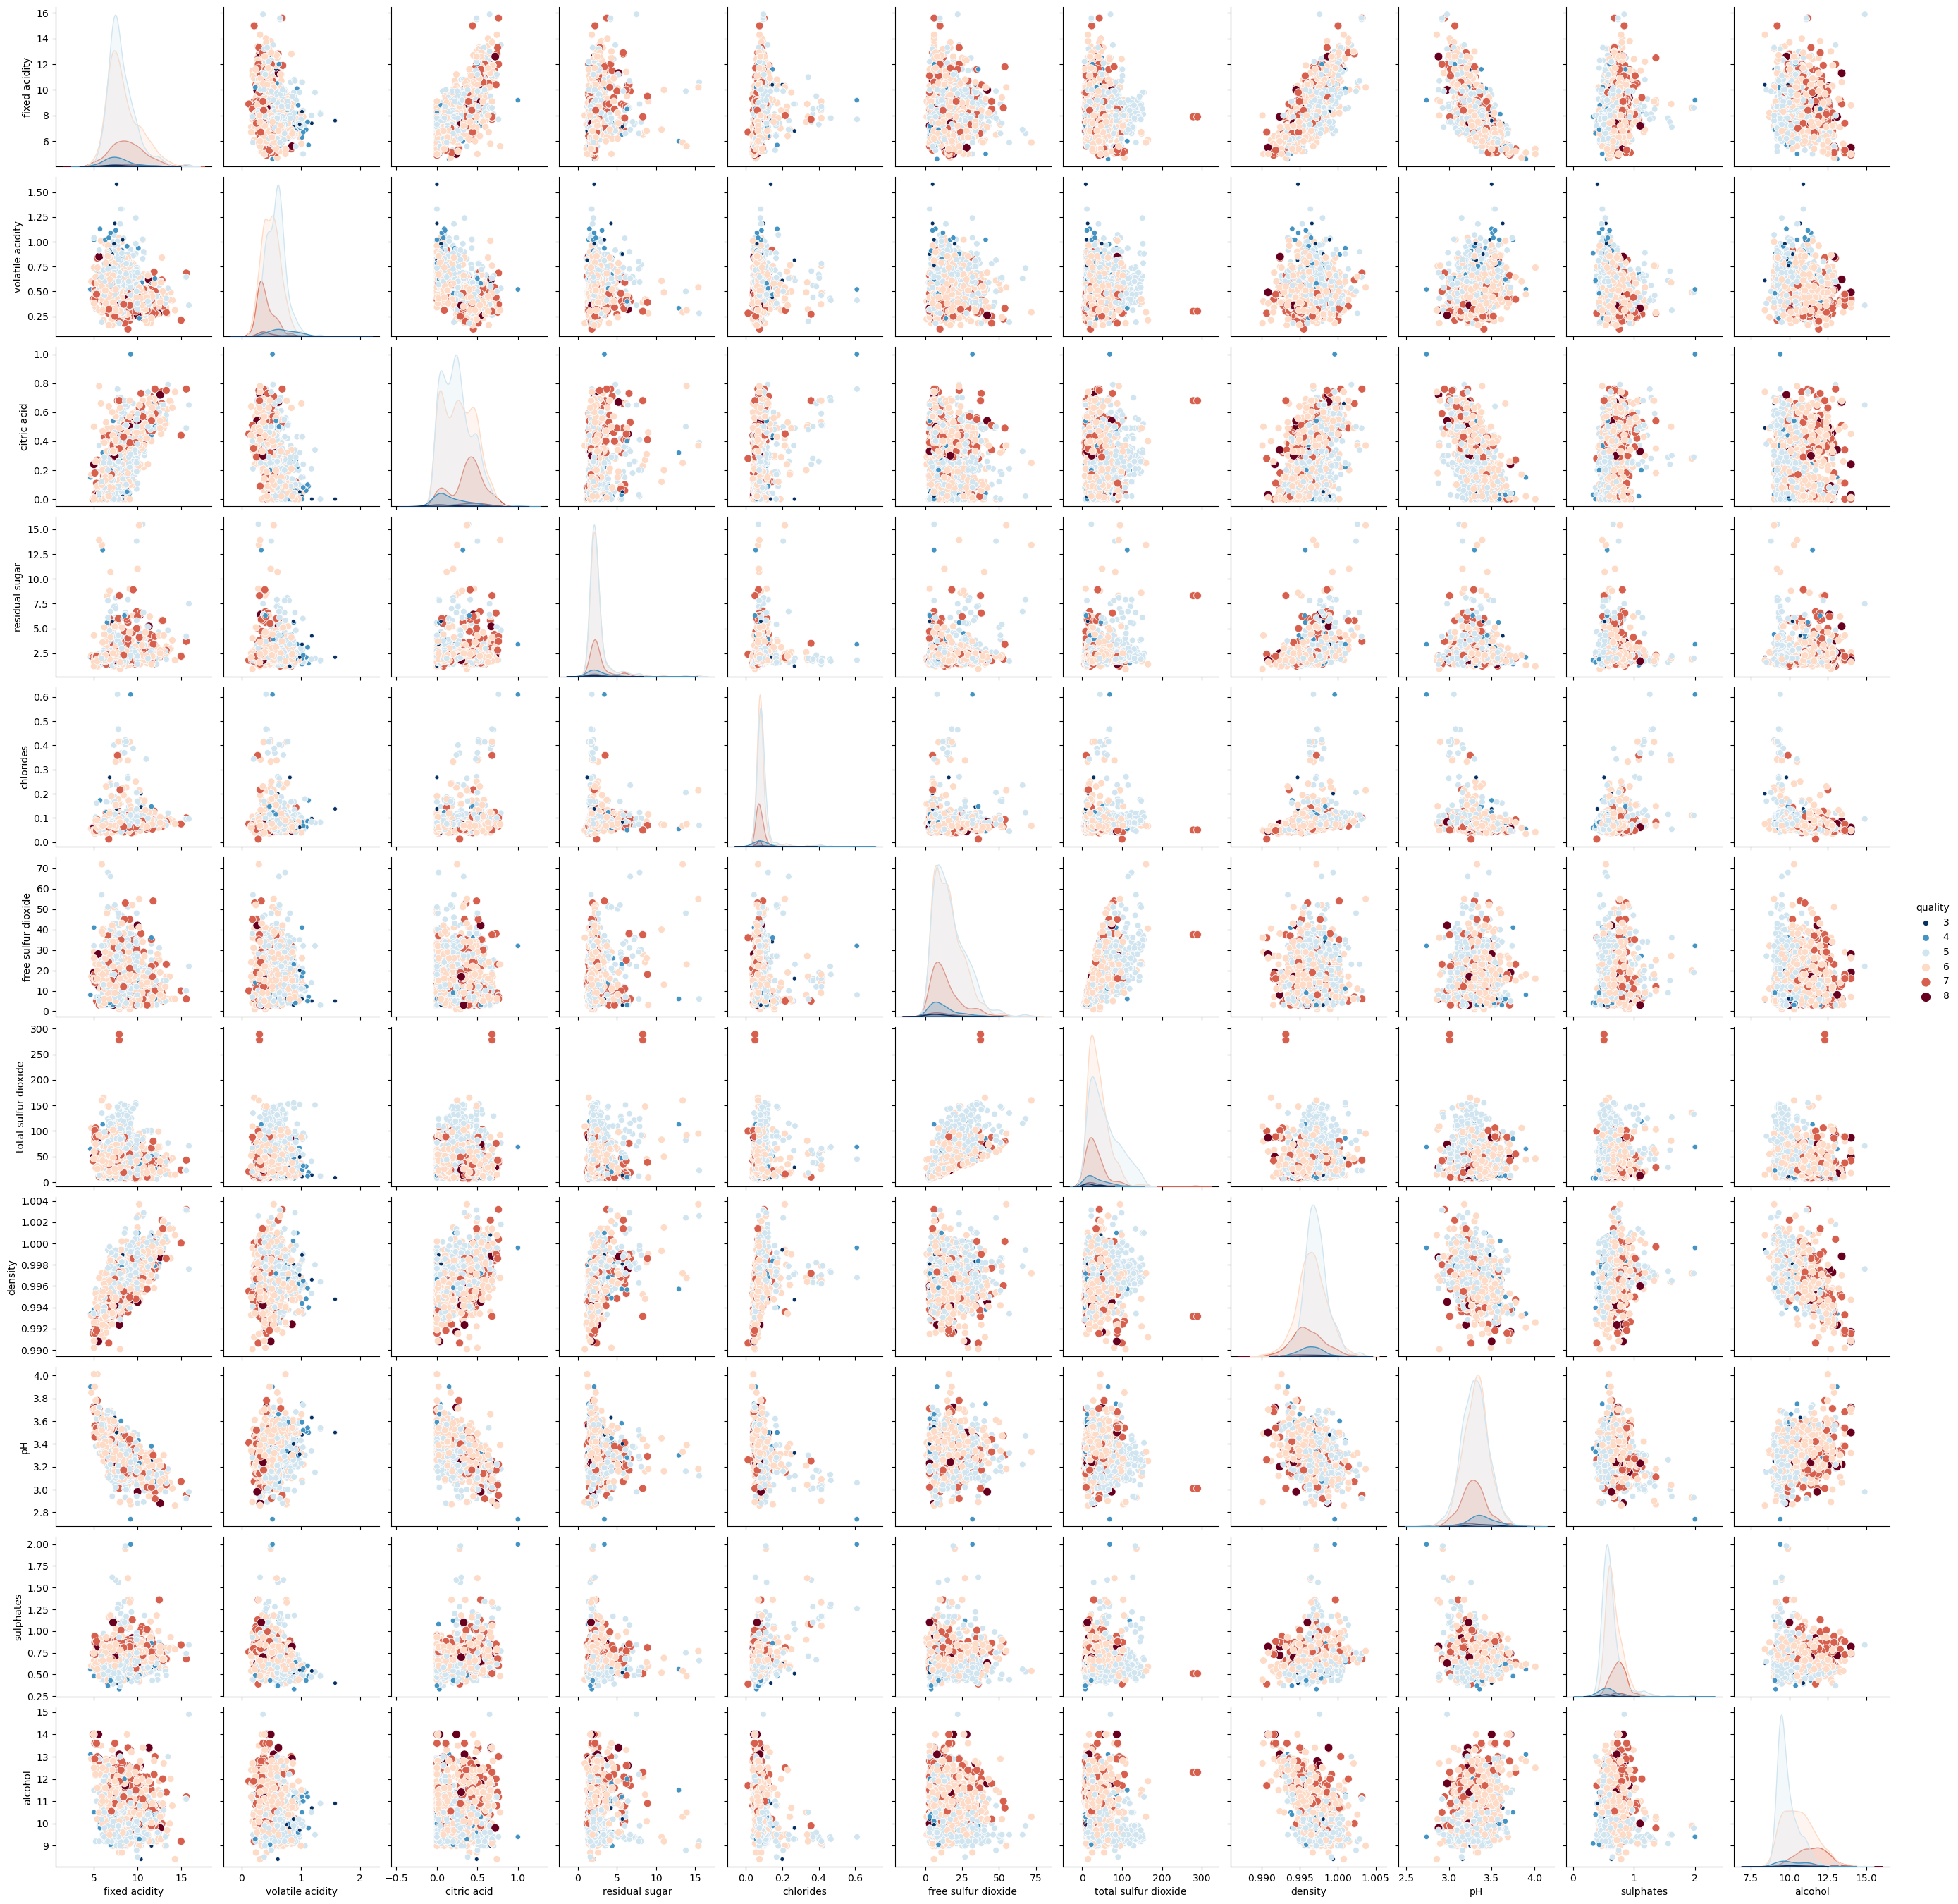

In [10]:
#Pair plots
sns.pairplot( #Initialise pair plots
    wine_data, #Data
    hue = 'quality', #Color by quality
    palette = 'RdBu_r', #High contrast color scheme
    plot_kws = dict(
        size = wine_data['quality'] #Size of the dots = quality, to make higher quality more visible
    )
)

plt.show() #Show

From this figure, we can infer some correlation between several variables. To quantify them, we will next look at a correlation table.

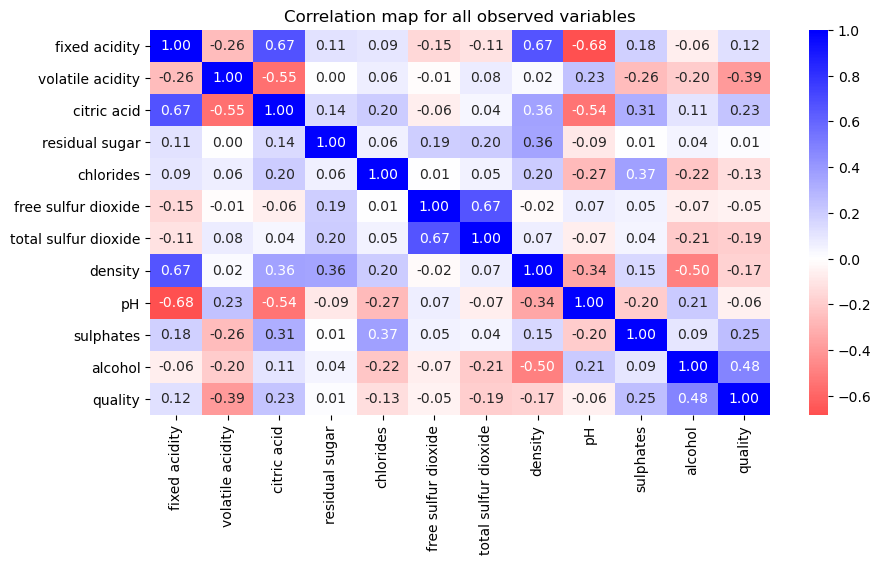

In [11]:
#Correlation plot
wine_corr = wine_data.corr() #Get correlation matrix

fig, ax = plt.subplots(figsize = (10,5)) #Initialise subplots with given size
ax = sns.heatmap( #Generate a heatmap
    wine_corr, #Data = correlation matrix
    cmap = 'bwr_r', #High contrast color scheme
    center = 0, #Center the color scheme on 0
    annot = True, #Show correlation values
    fmt = ".2f", #Only 2 significant numbers
    annot_kws = {
        'size': 10 #Size to fit within the cells of the matrix
    }
)

ax.set_title("Correlation map for all observed variables") #Title

plt.show() #Show

As we can see, several variables are over 50% correlated with one another, notably:
* pH and fixed acidity (which would be expected) at -0.68
* citric acid and fixed acidity at 0.67
* total sulfur dioxide and free sulfur dioxide at -0.67
* density and fixed acidity at -0.67
* citric acid and volatile acidity at -0.55
* pH and citric acid at -0.54
* density and alcohol at -0.50
As far as reported quality is concerned, however, the correlation pairs are relatively limited, with the highest being the alcohol concent at 0.48, but no other reach 0.4.
Moreover, while we can see some material correlation pairs, no variable variation is explained by another for more than 68%. In this context, and considering the limited number of variables overall, we will keep all the data before moving on to the modelling phase.